In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Churn Analysis.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replaced blanks with 0 as tenure was 0 and no total charges written

In [8]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df["customerID"].duplicated().sum()

np.int64(0)

#converted 0 & 1 values of senior citizen column to 'yes' & 'no' using functions

In [19]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [22]:
df.head(21)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<function matplotlib.pyplot.show(close=None, block=None)>

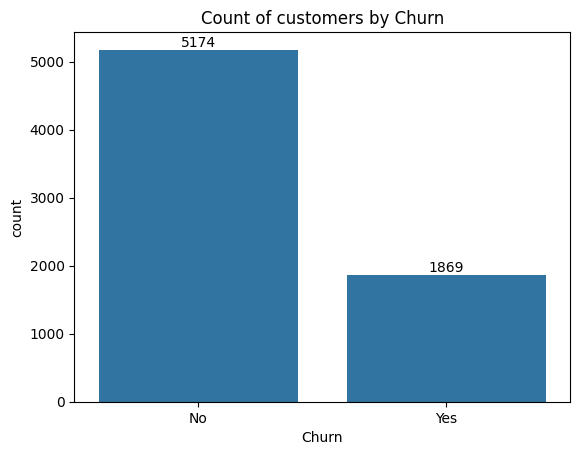

In [38]:
ax=sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show

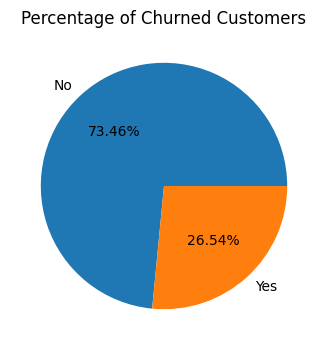

,Churn
Churn,
No,5174
Yes,1869


In [40]:
plt.figure(figsize=(4,4))
gb=df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()
gb

#Hence it can be concluded that 26.54% customers have churned out
#let's explore the reason behind it

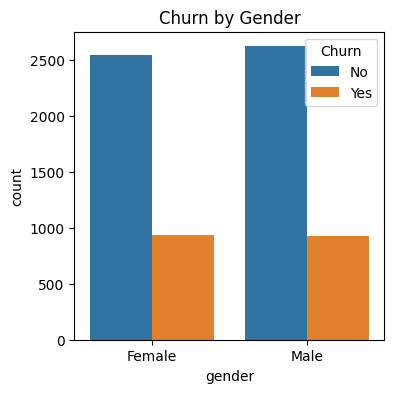

In [45]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

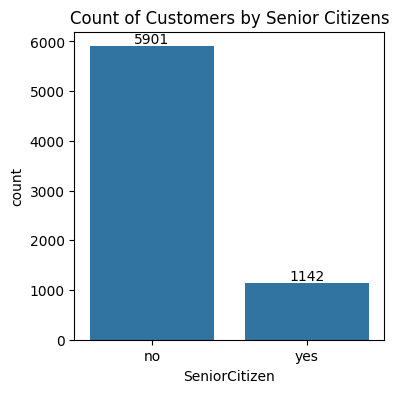

In [49]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizens")
plt.show()

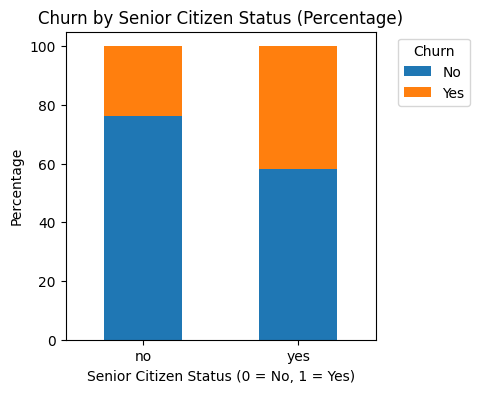

In [52]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100
ax = percentages.plot(kind='bar', stacked=True, figsize=(4, 4))

plt.title("Churn by Senior Citizen Status (Percentage)")
plt.xlabel("Senior Citizen Status (0 = No, 1 = Yes)")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=0)

plt.show()

#It can be concluded that senior citizens have churned out more compared to others

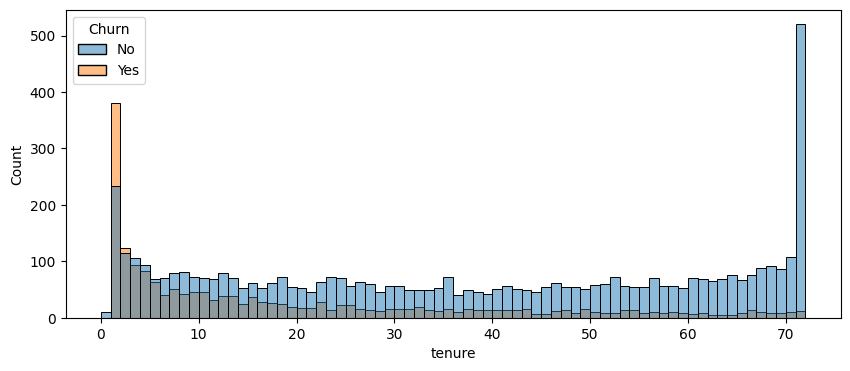

In [57]:
plt.figure(figsize=(10,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

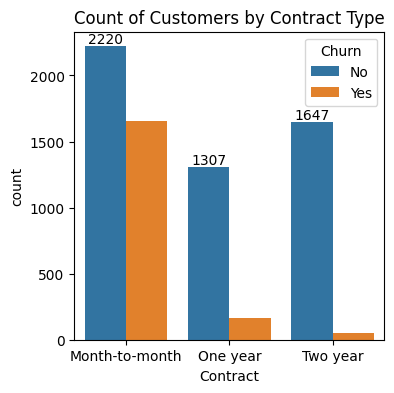

In [59]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract Type")
plt.show()

#customers using short term contracts are more likely to churn compared people using long term contracts 

In [60]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

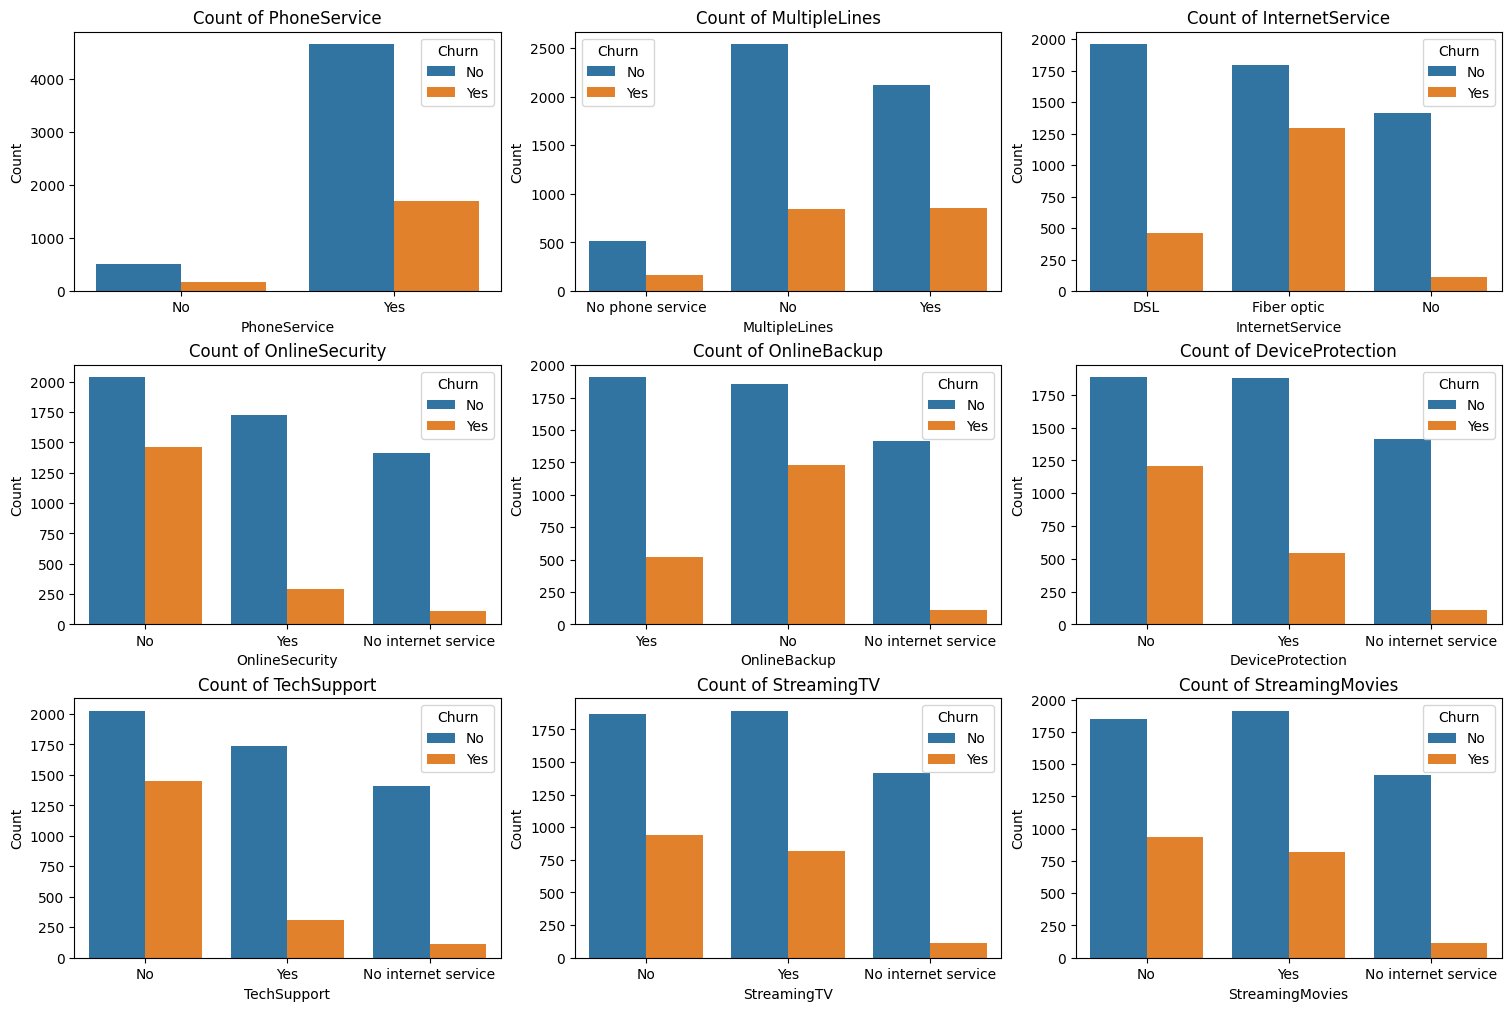

In [62]:
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n_cols = 3  
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=axes[i],hue="Churn")
    axes[i].set_title(f'Count of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

#From the data visualized in the charts, the services that appear to have the most significant impact on churn are: 
 Customers with No PhoneService or TechSupport show a higher churn rate. Fiber optic InternetService users have a significantly higher churn than DSL users. Additionally, services like OnlineSecurity, DeviceProtection, and Streaming (TV and Movies) also exhibit a noticeable churn. The churn rate is generally higher when customers lack these services or have poor engagement with them.



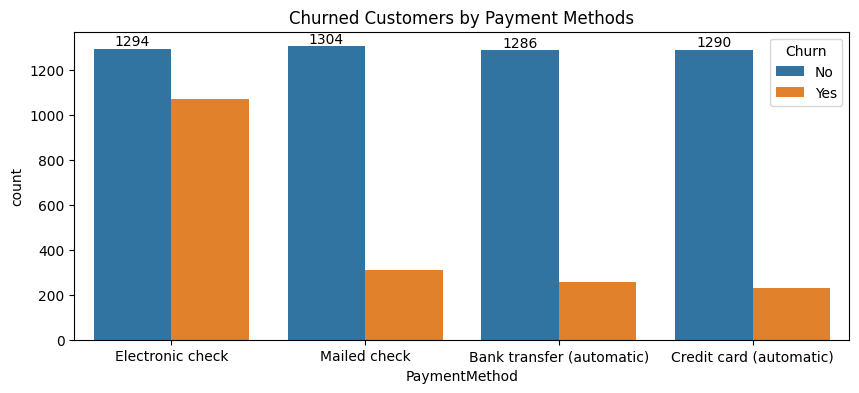

In [65]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by Payment Methods")
plt.show()

#customers are likely to churn whenthey are using electronic check as a payment method